# Sentiment Analysis test

In [144]:
%load_ext autoreload
%autoreload 2
import sys
import os
import glob
import numpy as np
import pandas as pd
from collections import defaultdict
sys.path.append("../../Code")
import matplotlib.pyplot as plt
import opinion_lexicon as op
import afinns as af
import vader
import s140
import so_cal as sc
import utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [205]:
pd.options.display.max_colwidth = 600

## Load Data with overall scores from tools

In [206]:
reviews = pd.read_csv('interrater_uq.csv', index_col=0)

In [207]:
len(reviews)

70

# Afinn - overall

In [211]:
reviews['afinn'] = reviews.comments.map(lambda x: af.get_score(x))

## Vader - Overall

In [213]:
reviews['vader'] = reviews.comments.map(lambda x: vader.get_score(x))

# S140

In [232]:
reviews = reviews.drop("s140", axis=1)

In [217]:
s140.save_review_s140(reviews,'reviews')

In [233]:
s140_dir = "s140/overall/out/"

In [234]:
reviews = s140.read_s140_scores(s140_dir, reviews)

70 Index(['string'], dtype='object')


# SO-CAL

In [239]:
sc.save_review_so_cal(reviews, 'comments')

In [245]:
reviews = sc.get_overall_sent('so_cal/overall/out/file_sentiment.csv', reviews)

## Add opinion Lexicon Scores

In [246]:
reviews['opinion_bow'] = reviews.comments.map(lambda x: op.get_score(x))

In [247]:
reviews['opinion_freq'] = reviews.comments.map(lambda x: op.get_score(x, "freq"))

In [248]:
reviews.head(2)

,idReview,id,date,reviewer_id,listing_id,recipient_id,comments,interrater_weighted_avg,num_of_raters,len,num_of_sents,afinn,vader,so_cal,s140,opinion_bow,opinion_freq
23431,48073,26771065,18/02/2015,9497078,195123,940724,The room was a good size. However it didn't seem that the sheets were clean since I found long female hair in the bed. Also I had an evening appointment and Susan told me that she lost her extra key so she couldn't provide me with my own key. And she would like me to not come home too late since she would have to wait up for me to return so she could let me into the building and the apartment. And if I wanted to come home after 11 pm she wanted me to call her to let her know. And she would prefer that I didn't come home later than 12. It really felt like a curfew and it was annoying since ...,1.63,8,240,10,4.0,0.7921,-0.466667,0,0.014493,0.012552
114008,231496,13506790,29/05/2014,13304632,2140284,10896934,"Me and my party have mixed feelings on our stay with Noa. I'll start with the positives: Noa is a great host. He gave us a warm welcome and a nice intro. to the area, transport etc. He even contacted me mid-stay with more suggestions on what to do. Noa also provided 2 sets of keys and was very flexible with check out times - much appreciated! We were provided with clean bedding and towels upon arrival and the fridge was stocked with a few complimentary drinks. The location of the flat is fantastic. A 1 minute walk to the bus stops (in and out of downtown) and a 4 minute walk to the subway....",2.13,8,361,27,36.0,0.9783,0.439216,0,0.085714,0.038889


### AFINN-Sentence Level

In [249]:
reviews['Affin-sentence'] = reviews.comments.map(lambda x: af.get_sentence_level_sent(x))

### Vader sentence Level

In [250]:
reviews['Vader-sentence'] = reviews.comments.map(lambda x: vader.get_sentence_level_sent(x))

### Sentiment-140 sentence Level

In [253]:
s140.save_review_sentence_short(reviews,'reviews_uq')

In [254]:
s140_dir = 's140/sent/out/'

In [255]:
reviews['s140-sentence'] = s140.get_sentence_level_sent(s140_dir, reviews)

### SO_CAL sentence level

In [256]:
sc.save_review_sentence(reviews, 'comments')

In [257]:
so_cal_dir = 'so_cal/sent/out/file_sentiment.csv'

In [262]:
reviews['so_cal-sentence'] = sc.get_sentence_level_sent(so_cal_dir, reviews)

### Opinion Lexion BOW Sentence Level 

In [264]:
reviews['opinion_bow-sentence'] = reviews.comments.map(lambda x: op.get_sentence_level_sent(x))

### Opinion Lexion Freq Sentence Level 

In [265]:
reviews['opinion_freq-sentence'] = reviews.comments.map(lambda x: op.get_sentence_level_sent(x, "freq"))

## Normalise Scores

In [266]:
summary_table = reviews[['idReview', 'id', 'comments',]]

In [267]:
summary_table.is_copy = False
summary_table['interrater'] = reviews['interrater_weighted_avg']/5

In [268]:
summary_table['afinn_o'] = utils.minmaxscale(reviews, 'afinn')

In [269]:
summary_table['vader_o'] = utils.minmaxscale(reviews, 'vader')

In [270]:
summary_table['so_cal_o'] = utils.minmaxscale(reviews, 'so_cal')

In [271]:
summary_table['s140_o'] = utils.minmaxscale(reviews, 's140')

In [272]:
summary_table['op_bow_o'] = utils.minmaxscale(reviews, 'opinion_bow')

In [273]:
summary_table['op_freq_o'] = utils.minmaxscale(reviews, 'opinion_freq')

# Normalise and average out sentence level scores

In [274]:
def reduce_to_average(col):
    vals = []
    for i in col:
        reduced = [v for v in utils.to_float(i) if v <= 4.75 or v >= 5.25]
        vals.append(format(np.average(reduced), ".3f"))
    return vals

In [275]:
sentence_table = reviews[['idReview', 'id', 'comments',]]

In [276]:
sentence_table.is_copy = False
sentence_table['afinn_s'] = utils.minmaxscale_sent(reviews, 'Affin-sentence')

In [277]:
sentence_table['vader_s'] = utils.minmaxscale_sent(reviews, 'Vader-sentence')

In [278]:
sentence_table['so_cal_s'] = utils.minmaxscale_sent(reviews, 'so_cal-sentence')

In [279]:
sentence_table['s140_s'] = utils.minmaxscale_sent(reviews, 's140-sentence')

In [305]:
sentence_table['op_bow_s'] = utils.minmaxscale_sent(reviews, 'opinion_bow-sentence')

In [281]:
sentence_table['op_freq_s'] = utils.minmaxscale_sent(reviews, 'opinion_freq-sentence')

In [330]:
sentence_table.head(5)

,idReview,id,comments,afinn_s,vader_s,so_cal_s,s140_s,op_box_s,op_freq_s,op_bow_s
23431,48073,26771065,The room was a good size. However it didn't seem that the sheets were clean since I found long female hair in the bed. Also I had an evening appointment and Susan told me that she lost her extra key so she couldn't provide me with my own key. And she would like me to not come home too late since she would have to wait up for me to return so she could let me into the building and the apartment. And if I wanted to come home after 11 pm she wanted me to call her to let her know. And she would prefer that I didn't come home later than 12. It really felt like a curfew and it was annoying since ...,"[0.379, 0.345, 0.172, 0.345, 0.276, 0.276, 0.207, 0.276, 0.241, 0.379]","[0.700, 0.679, 0.286, 0.657, 0.460, 0.460, 0.249, 0.240, 0.789, 0.249]","[0.720, 0.600, 0.560, 0.480, 0.600, 0.600, 0.480, 0.560, 0.680, 0.600]","[0.500, 0.500, 0.500, 0.500, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.500, 0.500, 0.000, 0.000, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500]","[0.667, 0.550, 0.444, 0.542, 0.500, 0.583, 0.464, 0.455, 0.531, 0.750]","[0.667, 0.603, 0.549, 0.589, 0.571, 0.619, 0.558, 0.550, 0.584, 0.635]","[0.667, 0.550, 0.444, 0.542, 0.500, 0.583, 0.464, 0.455, 0.531, 0.750]"
114008,231496,13506790,"Me and my party have mixed feelings on our stay with Noa. I'll start with the positives: Noa is a great host. He gave us a warm welcome and a nice intro. to the area, transport etc. He even contacted me mid-stay with more suggestions on what to do. Noa also provided 2 sets of keys and was very flexible with check out times - much appreciated! We were provided with clean bedding and towels upon arrival and the fridge was stocked with a few complimentary drinks. The location of the flat is fantastic. A 1 minute walk to the bus stops (in and out of downtown) and a 4 minute walk to the subway....","[0.276, 0.379, 0.483, 0.276, 0.276, 0.345, 0.345, 0.414, 0.241, 0.379, 0.379, 0.276, 0.276, 0.448, 0.345, 0.276, 0.276, 0.310, 0.172, 0.241, 0.414, 0.276, 0.345, 0.276, 0.379, 0.345, 0.241]","[0.679, 0.906, 0.881, 0.460, 0.460, 0.841, 0.831, 0.764, 0.376, 0.690, 0.460, 0.460, 0.460, 0.859, 0.779, 0.460, 0.460, 0.309, 0.342, 0.298, 0.920, 0.431, 0.700, 0.460, 0.121, 0.770, 0.417]","[0.600, 0.720, 0.600, 0.560, 0.600, 0.680, 0.560, 0.600, 0.600, 0.480, 0.520, 0.600, 0.680, 0.640, 0.560, 0.480, 0.600, 0.520, 0.640, 0.600, 0.600, 0.600, 0.840, 0.600, 0.640, 0.600, 0.600]","[0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 1.000, 1.000, 0.500, 0.500, 0.000, 0.000, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 1.000, 1.000, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500]","[0.500, 0.667, 0.750, 0.500, 0.500, 0.591, 0.600, 0.667, 0.500, 0.600, 1.000, 0.500, 0.455, 0.611, 0.500, 0.500, 0.500, 0.500, 0.389, 0.500, 0.688, 0.500, 0.500, 0.500, 0.500, 0.562, 0.250]","[0.571, 0.686, 0.743, 0.571, 0.571, 0.639, 0.629, 0.653, 0.571, 0.619, 0.686, 0.571, 0.549, 0.639, 0.571, 0.571, 0.571, 0.571, 0.514, 0.571, 0.694, 0.571, 0.571, 0.571, 0.571, 0.595, 0.286]","[0.500, 0.667, 0.750, 0.500, 0.500, 0.591, 0.600, 0.667, 0.500, 0.600, 1.000, 0.500, 0.455, 0.611, 0.500, 0.500, 0.500, 0.500, 0.389, 0.500, 0.688, 0.500, 0.500, 0.500, 0.500, 0.562, 0.250]"
115123,234538,58239138,"Ari was awesome we were so fortunate to book his place last minute in NYC on New Years eve! My partner and I had booked a different airbnb for the evening previously but unfortunately the host had a change of plans and had to cancel on us. In a mad scramble I found Ari's place and it was everything we could have hoped for and more. The apartment itself was clean, modern and warm, huge by New York standards. We only met Ari for a minute on his way out, he handed us the keys and gave us a quick overview. While we were out for most

In [283]:
summary_table['afinn_s'] = reduce_to_average(sentence_table['afinn_s'])

In [284]:
summary_table['vader_s'] = reduce_to_average(sentence_table['vader_s'])

In [285]:
summary_table['s140_s'] = reduce_to_average(sentence_table['s140_s'])

In [286]:
summary_table['so_cal_s'] = reduce_to_average(sentence_table['so_cal_s'])

In [306]:
summary_table['op_bow_s'] = reduce_to_average(sentence_table['op_bow_s'])

In [288]:
summary_table['op_freq_s'] = reduce_to_average(sentence_table['op_freq_s'])

In [294]:
summary_table.head(5)

,idReview,id,comments,interrater,afinn_o,vader_o,so_cal_o,s140_o,op_bow_o,op_freq_o,afinn_s,vader_s,s140_s,so_cal_s,op_box_s,op_freq_s
23431,48073,26771065,The room was a good size. However it didn't seem that the sheets were clean since I found long female hair in the bed. Also I had an evening appointment and Susan told me that she lost her extra key so she couldn't provide me with my own key. And she would like me to not come home too late since she would have to wait up for me to return so she could let me into the building and the apartment. And if I wanted to come home after 11 pm she wanted me to call her to let her know. And she would prefer that I didn't come home later than 12. It really felt like a curfew and it was annoying since ...,0.326,0.255319,0.889406,0.300218,0.0,0.296236,0.372115,0.290,0.477,0.300,0.588,0.549,0.592
114008,231496,13506790,"Me and my party have mixed feelings on our stay with Noa. I'll start with the positives: Noa is a great host. He gave us a warm welcome and a nice intro. to the area, transport etc. He even contacted me mid-stay with more suggestions on what to do. Noa also provided 2 sets of keys and was very flexible with check out times - much appreciated! We were provided with clean bedding and towels upon arrival and the fridge was stocked with a few complimentary drinks. The location of the flat is fantastic. A 1 minute walk to the bus stops (in and out of downtown) and a 4 minute walk to the subway....",0.426,0.936170,0.990103,0.404639,0.0,0.457096,0.473396,0.322,0.578,0.519,0.604,0.549,0.590
115123,234538,58239138,"Ari was awesome we were so fortunate to book his place last minute in NYC on New Years eve! My partner and I had booked a different airbnb for the evening previously but unfortunately the host had a change of plans and had to cancel on us. In a mad scramble I found Ari's place and it was everything we could have hoped for and more. The apartment itself was clean, modern and warm, huge by New York standards. We only met Ari for a minute on his way out, he handed us the keys and gave us a quick overview. While we were out for most of the day and evening, when we got back the apartment bui...",0.950,0.468085,0.991672,0.592008,0.0,0.480080,0.479447,0.329,0.614,0.444,0.680,0.570,0.613
163454,342257,49807970,"Catia's small studio is lovely, well-decorated and she's done a great job organizing it, which is important since it's a small space. It was fine for two of us (my wife and I). The only slight issue is that there's really not much of a place to put clothing that doesn't hang -- we had to use the couch for that purpose. She has a well-functioning kitchen and a Nespresso machine and milk steamer which quickly makes nice shots. The small stove works nicely. The location is convenient, just a couple of blocks from Penn Station with easy access to subway lines. She has TV and a Roku box so when...",0.750,0.574468,0.988643,0.482088,1.0,0.591363,0.641904,0.358,0.661,0.500,0.635,0.611,0.644
175135,365577,74515089,"Sasha was kind enough to pick us up at the subway station and walked with us to his apartment. A very kind and hospitable man. We stayed there for four nights and didn't see him and his wife much during our stay because we were in town most of the time. The apartment was okay, but not very clean. The dog was well-behaved and playful, but his hairs were all-over. The location is very good! Nice safe neighborhood, lots of restaurants nearby, super close to the subway and 2 blocks to central park. The price was decent as well.",0.600,0.531915,0.989833,0.549969,0.0,0.788757,0.742676,0.349,0.635,0.562,0.670,0.661,0.657


In [291]:
summary_table['interrater'] = summary_table['interrater'].astype(float)

# Calculate Error

In [292]:
def rss(tbl, c1, c2):
    return np.sum([(float(r[c1]) - float(r[c2]))**2 for i, r in tbl.iterrows()])

In [307]:
for a in ['afinn_o', 'vader_o', 'so_cal_o', 's140_o', 'op_bow_o', 'op_freq_o', 'afinn_s', 'vader_s', 's140_s', 'so_cal_s', 'op_bow_s', 'op_freq_s']:
    print("Error for %s : %.2f" % (a, rss(summary_table, 'interrater', a)))

Error for afinn_o : 7.88
Error for vader_o : 5.55
Error for so_cal_o : 5.75
Error for s140_o : 11.33
Error for op_bow_o : 6.32
Error for op_freq_o : 5.21
Error for afinn_s : 14.11
Error for vader_s : 2.88
Error for s140_s : 7.33
Error for so_cal_s : 3.59
Error for op_bow_s : 5.28
Error for op_freq_s : 4.57


# Split into Levels for further evaluation

In [295]:
def split_into_levels(in_tbl, out_tbl, col, type=1):
    vals = []
    out_tbl.is_copy = False
    if type == 1:
        for i, r in in_tbl.iterrows():
            if (r[col]<=0.2):
                vals.append(1)
            elif (r[col]>0.2 and r[col]<=0.4):
                vals.append(2)
            elif (r[col]>0.4 and r[col]<=0.6):
                vals.append(3)
            elif (r[col]>0.6 and r[col]<=0.8):
                vals.append(4)
            elif (r[col]>0.8):
                vals.append(5)
    elif type == 2:
        for i, r in in_tbl.iterrows():
            if (r[col]<=0.35):
                vals.append(1)
            elif (r[col]>0.35 and r[col]<=0.65):
                vals.append(2)
            elif (r[col]>0.65):
                vals.append(3)
    else:
        return none
    out_tbl["sat_level_" + col] = vals
    return out_tbl

In [296]:
def build_levels_table(tbl, tools, type=1):
    levels_tbl = tbl[['id', 'comments']]
    for t in tools:
        levels_tbl = split_into_levels(tbl, levels_tbl, t, type)
    return levels_tbl

In [325]:
overall_tools = ['afinn_o', 'vader_o', 'so_cal_o', 's140_o', 'op_bow_o', 'op_freq_o']
sentence_tools = ['afinn_s', 'vader_s', 'so_cal_s', 's140_s', 'op_bow_s', 'op_freq_s']

In [326]:
overall_lvl_tbl = build_levels_table(summary_table, overall_tools.append('interrater'), 2)

TypeError: 'NoneType' object is not iterable

In [302]:
overall_lvl_tbl

,id,comments,sat_level_interrater,sat_level_afinn_o,sat_level_vader_o,sat_level_so_cal_o,sat_level_s140_o,sat_level_op_bow_o,sat_level_op_freq_o
23431,26771065,The room was a good size. However it didn't seem that the sheets were clean since I found long female hair in the bed. Also I had an evening appointment and Susan told me that she lost her extra key so she couldn't provide me with my own key. And she would like me to not come home too late since she would have to wait up for me to return so she could let me into the building and the apartment. And if I wanted to come home after 11 pm she wanted me to call her to let her know. And she would prefer that I didn't come home later than 12. It really felt like a curfew and it was annoying since ...,1,1,3,1,1,1,2
114008,13506790,"Me and my party have mixed feelings on our stay with Noa. I'll start with the positives: Noa is a great host. He gave us a warm welcome and a nice intro. to the area, transport etc. He even contacted me mid-stay with more suggestions on what to do. Noa also provided 2 sets of keys and was very flexible with check out times - much appreciated! We were provided with clean bedding and towels upon arrival and the fridge was stocked with a few complimentary drinks. The location of the flat is fantastic. A 1 minute walk to the bus stops (in and out of downtown) and a 4 minute walk to the subway....",2,3,3,2,1,2,2
115123,58239138,"Ari was awesome we were so fortunate to book his place last minute in NYC on New Years eve! My partner and I had booked a different airbnb for the evening previously but unfortunately the host had a change of plans and had to cancel on us. In a mad scramble I found Ari's place and it was everything we could have hoped for and more. The apartment itself was clean, modern and warm, huge by New York standards. We only met Ari for a minute on his way out, he handed us the keys and gave us a quick overview. While we were out for most of the day and evening, when we got back the apartment bui...",3,2,3,2,1,2,2
163454,49807970,"Catia's small studio is lovely, well-decorated and she's done a great job organizing it, which is important since it's a small space. It was fine for two of us (my wife and I). The only slight issue is that there's really not much of a place to put clothing that doesn't hang -- we had to use the couch for that purpose. She has a well-functioning kitchen and a Nespresso machine and milk steamer which quickly makes nice shots. The small stove works nicely. The location is convenient, just a couple of blocks from Penn Station with easy access to subway lines. She has TV and a Roku box so when...",3,2,3,2,3,2,2
175135,74515089,"Sasha was kind enough to pick us up at the subway station and walked with us to his apartment. A very kind and hospitable man. We stayed there for four nights and didn't see him and his wife much during our stay because we were in town most of the time. The apartment was okay, but not very clean. The dog was well-behaved and playful, but his hairs were all-over. The location is very good! Nice safe neighborhood, lots of restaurants nearby, super close to the subway and 2 blocks to central park. The price was decent as well.",2,2,3,2,1,3,3
176985,34792972,We had a great stay. Everything was as expected and the townhouse was even much bigger than we anticipated given he typically small NYC apartments. It was amazing to stay in a traditional New York brownstone. There were 4 floors total in the townhouse. 2 twin beds in a room and a queen bed in a room on each of the two upper floors. Each of the two upper floors had a bathroom. The main floor had a living room and large open kitchen. The basement had a large TV in the living area and the third bathroom. The stairs were a bit steep and narrow for the mobility impaired but we're fine for our ...,3,2,3,2,3,2,2
203736,41439946,"Susan made my first AirBnb experience one that will be hard to top! She stayed in contact with me leading up to my arrival, a

In [309]:
summary_table[sentence_tools] = summary_table[sentence_tools].astype(float)

In [310]:
sentence_lvl_tbl = build_levels_table(summary_table, sentence_tools, 2)

In [311]:
sentence_lvl_tbl

,id,comments,sat_level_interrater,sat_level_afinn_s,sat_level_vader_s,sat_level_so_cal_s,sat_level_s140_s,sat_level_op_bow_s,sat_level_op_freq_s
23431,26771065,The room was a good size. However it didn't seem that the sheets were clean since I found long female hair in the bed. Also I had an evening appointment and Susan told me that she lost her extra key so she couldn't provide me with my own key. And she would like me to not come home too late since she would have to wait up for me to return so she could let me into the building and the apartment. And if I wanted to come home after 11 pm she wanted me to call her to let her know. And she would prefer that I didn't come home later than 12. It really felt like a curfew and it was annoying since ...,1,1,2,2,1,2,2
114008,13506790,"Me and my party have mixed feelings on our stay with Noa. I'll start with the positives: Noa is a great host. He gave us a warm welcome and a nice intro. to the area, transport etc. He even contacted me mid-stay with more suggestions on what to do. Noa also provided 2 sets of keys and was very flexible with check out times - much appreciated! We were provided with clean bedding and towels upon arrival and the fridge was stocked with a few complimentary drinks. The location of the flat is fantastic. A 1 minute walk to the bus stops (in and out of downtown) and a 4 minute walk to the subway....",2,1,2,2,2,2,2
115123,58239138,"Ari was awesome we were so fortunate to book his place last minute in NYC on New Years eve! My partner and I had booked a different airbnb for the evening previously but unfortunately the host had a change of plans and had to cancel on us. In a mad scramble I found Ari's place and it was everything we could have hoped for and more. The apartment itself was clean, modern and warm, huge by New York standards. We only met Ari for a minute on his way out, he handed us the keys and gave us a quick overview. While we were out for most of the day and evening, when we got back the apartment bui...",3,1,2,3,2,2,2
163454,49807970,"Catia's small studio is lovely, well-decorated and she's done a great job organizing it, which is important since it's a small space. It was fine for two of us (my wife and I). The only slight issue is that there's really not much of a place to put clothing that doesn't hang -- we had to use the couch for that purpose. She has a well-functioning kitchen and a Nespresso machine and milk steamer which quickly makes nice shots. The small stove works nicely. The location is convenient, just a couple of blocks from Penn Station with easy access to subway lines. She has TV and a Roku box so when...",3,2,3,2,2,2,2
175135,74515089,"Sasha was kind enough to pick us up at the subway station and walked with us to his apartment. A very kind and hospitable man. We stayed there for four nights and didn't see him and his wife much during our stay because we were in town most of the time. The apartment was okay, but not very clean. The dog was well-behaved and playful, but his hairs were all-over. The location is very good! Nice safe neighborhood, lots of restaurants nearby, super close to the subway and 2 blocks to central park. The price was decent as well.",2,1,2,3,2,3,3
176985,34792972,We had a great stay. Everything was as expected and the townhouse was even much bigger than we anticipated given he typically small NYC apartments. It was amazing to stay in a traditional New York brownstone. There were 4 floors total in the townhouse. 2 twin beds in a room and a queen bed in a room on each of the two upper floors. Each of the two upper floors had a bathroom. The main floor had a living room and large open kitchen. The basement had a large TV in the living area and the third bathroom. The stairs were a bit steep and narrow for the mobility impaired but we're fine for our ...,3,1,2,2,2,2,2
203736,41439946,"Susan made my first AirBnb experience one that will be hard to top! She stayed in contact with me leading up to my arrival, a

# Analyse sentences

In [312]:
txt = "Not the first time and not the last time we'll stay at Donna's place. She treats us better than if she were my sister! Friendly, helpful, flexible and respectful are what best describe our host. The space is in the best place and the large, clean, modern bathroom is very welcome. I should be careful of making it sound too nice because YOU may have booked the week that I want in the future!"
scores = [0.400, 0.480, 0.764, 0.600, 0.435]

In [313]:
from IPython.core.display import HTML
from nltk.tokenize import sent_tokenize
def analyse_review (text, scores, type=1):
    sents = sent_tokenize(text)
    out = []
    if type == 1:
        for i, sent in zip(range(len(sents)), sents):
            if (scores[i]<=0.2):
                out.append("<font color='#c40909'>" + sent +"</font>")
            elif (scores[i]>0.2 and scores[i]<=0.4):
                out.append("<font color='#ef8c13'>" + sent +"</font>")
            elif (scores[i]>0.4 and scores[i]<=0.6):
                out.append("<font color='#ecef13'>" + sent +"</font>")
            elif (scores[i]>0.6 and scores[i]<=0.8):
                out.append("<font color='#85c433'>" + sent +"</font>")
            elif (scores[i]>0.8):
                out.append("<font color='#4a9b37'>" + sent +"</font>")
    elif type == 2:
        for i, sent in zip(range(len(sents)), sents):
            if (scores[i]<=0.35):
                out.append("<font color='#c40909'>" + sent +"</font>")
            elif (scores[i]>0.35 and scores[i]<=0.65):
                out.append("<font color='#ecef13'>" + sent +"</font>")
            elif (scores[i]>0.65):
                out.append("<font color='#4a9b37'>" + sent +"</font>")
    else:
        return None
        
    words = "<div style='margin: 20px;border: solid 20px;'><p style='background-color:black;margin=10px;'><b>" + " ".join(out) + "</b></p></div>"
    return HTML(words)
    

In [314]:
analyse_review (txt, scores, 2)

In [329]:
for i,r in sentence_table.iterrows():
    for t in sentence_tools:
        analyse_review (r['comments'], r[t].astype(int), 2)

AttributeError: 'list' object has no attribute 'astype'

# Confusion Matrix

In [315]:
def create_confusion_matrix(labels, predictions):
    """
    Creates a confusion matrix that counts for each gold label how often it was labelled by what label
    in the predictions.
    Args:
        data: a list of gold (x,y) pairs.
        predictions: a list of y labels, same length and with matching order.

    Returns:
        a `defaultdict` that maps `(gold_label,guess_label)` pairs to their prediction counts.
    """
    confusion = defaultdict(int)
    for y_gold, y_guess in zip(labels, predictions):
        confusion[(y_gold, y_guess)] += 1
    return confusion

In [316]:

def evaluate(conf_matrix, label_filter=None):
    """
    Evaluate Precision, Recall and F1 based on a confusion matrix as produced by `create_confusion_matrix`.
    Args:
        conf_matrix: a confusion matrix in form of a dictionary from `(gold_label,guess_label)` pairs to counts.
        label_filter: a set of gold labels to consider. If set to `None` all labels are considered.

    Returns:
        Precision, Recall, F1 triple.
    """
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for (gold, guess), count in conf_matrix.items():
        if label_filter is None or gold in label_filter or guess in label_filter:
            if gold == 'None' and guess != gold:
                fp += count
            elif gold == 'None' and guess == gold:
                tn += count
            elif gold != 'None' and guess == gold:
                tp += count
            elif gold != 'None' and guess == 'None':
                fn += count
            else:  # both gold and guess are not-None, but different
                fp += count if label_filter is None or guess in label_filter else 0
                fn += count if label_filter is None or gold in label_filter else 0
    prec = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    f1 = 2 * prec * recall / (prec + recall) if prec * recall > 0 else 0.0
    return prec, recall, f1

In [317]:
def full_evaluation_table(confusion_matrix):
    """
    Produce a pandas data-frame with Precision, F1 and Recall for all labels.
    Args:
        confusion_matrix: the confusion matrix to calculate metrics from.

    Returns:
        a pandas Dataframe with one row per gold label, and one more row for the aggregate of all labels.
    """
    labels = sorted(list({l for l, _ in confusion_matrix.keys()} | {l for _, l in confusion_matrix.keys()}))
    gold_counts = defaultdict(int)
    guess_counts = defaultdict(int)
    for (gold_label, guess_label), count in confusion_matrix.items():
        if gold_label != "None":
            gold_counts[gold_label] += count
            gold_counts["[All]"] += count
        if guess_label != "None":
            guess_counts[guess_label] += count
            guess_counts["[All]"] += count

    result_table = []
    for label in labels:
        if label != "None":
            result_table.append((label, gold_counts[label], guess_counts[label], *evaluate(confusion_matrix, {label})))

    result_table.append(("[All]", gold_counts["[All]"], guess_counts["[All]"], *evaluate(confusion_matrix)))
    return pd.DataFrame(result_table, columns=('Label', 'Gold', 'Guess', 'Precision', 'Recall', 'F1'))

In [318]:
def plot_confusion_matrix_dict(matrix_dict, rotation=45, outside_label=""):
    labels = set([y for y, _ in matrix_dict.keys()] + [y for _, y in matrix_dict.keys()])
    sorted_labels = sorted(labels)
    matrix = np.zeros((len(sorted_labels), len(sorted_labels)))
    for i1, y1 in enumerate(sorted_labels):
        for i2, y2 in enumerate(sorted_labels):
            if y1 != outside_label or y2 != outside_label:
                matrix[i1, i2] = matrix_dict[y1, y2]
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(len(sorted_labels))
    plt.xticks(tick_marks, sorted_labels, rotation=rotation)
    plt.yticks(tick_marks, sorted_labels)
    plt.tight_layout()

In [319]:
cm = create_confusion_matrix(overall_lvl_tbl['sat_level_interrater'], overall_lvl_tbl['sat_level_op_bow_o'])

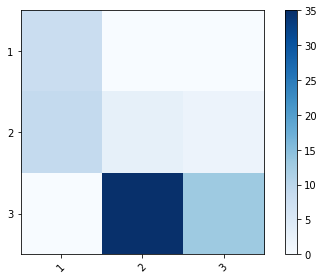

In [320]:
plot_confusion_matrix_dict(cm)
plt.show()

In [321]:
evaluate(cm)

(0.34285714285714286, 0.34285714285714286, 0.34285714285714286)

In [322]:
full_evaluation_table(cm)

,Label,Gold,Guess,Precision,Recall,F1
0,1,8,17,0.470588,1.000000,0.640000
1,2,14,38,0.078947,0.214286,0.115385
2,3,48,15,0.866667,0.270833,0.412698
3,[All],70,70,0.342857,0.342857,0.342857
